# Stellar Classification - Logistic Regression

### Import Modules

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

### Read data and check data types

In [57]:
df = pd.read_csv('stellar_data.csv')

In [58]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

### Check for null values

In [59]:
df.isnull().values.any()

False

### Detect and Remove Outliers

In [60]:
df.shape

(100000, 18)

<AxesSubplot:xlabel='u'>

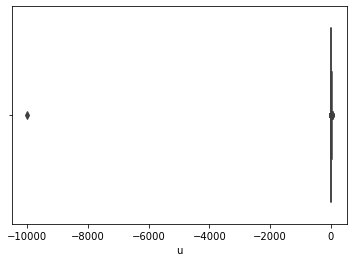

In [61]:
sn.boxplot(x=df['u'])

<AxesSubplot:xlabel='redshift'>

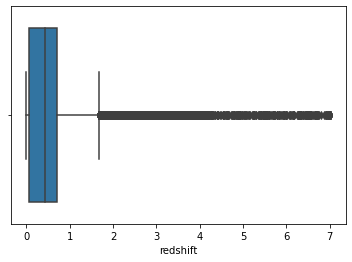

In [62]:
sn.boxplot(x=df['redshift'])

In [63]:
df.drop(np.where(df['u'] < 0)[0], inplace=True)
df.drop(np.where(df['redshift'] > 2.5)[0], inplace=True)

In [64]:
df.shape

(97083, 18)

### Separate target variable from the rest of the data

In [65]:
target = df['class'].copy()
data = df.drop(columns=['class']).copy()

In [66]:
target.value_counts()

GALAXY    59200
STAR      21422
QSO       16461
Name: class, dtype: int64

### Separate data into training and testing set

In [67]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

### Feature Scaling

In [68]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Fit Logistic Regression model to training set

In [69]:
classifier = LogisticRegression(max_iter=1000, random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)


### Predict the test result

In [70]:
y_pred = classifier.predict(x_test)

### Create the confusion matrix

In [71]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,GALAXY,QSO,STAR
Actual,,,
GALAXY,17237,278,279
QSO,652,4245,5
STAR,0,1,6428


### Calculate evaluation metrics

In [72]:
metrics.accuracy_score(y_test, y_pred)

0.9582832618025751

In [77]:
report = metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)
report = pd.DataFrame(report).transpose()
report

,precision,recall,f1-score,support
GALAXY,0.963553,0.968697,0.966118,17794.000000
QSO,0.938329,0.865973,0.900700,4902.000000
STAR,0.957688,0.999844,0.978312,6429.000000
accuracy,0.958283,0.958283,0.958283,0.958283
macro avg,0.953190,0.944838,0.948377,29125.000000
weighted avg,0.958013,0.958283,0.957800,29125.000000
